# Multidimensional Visualization

This notebook contains an introduction to the multidimensional visualization methods data scientists use to explore relationships between the variables in complex data sets. Data scientists spend a lot of time working on understanding relationships between variables in the data, and visualization is a key skill for this tasks. 

Inherently, computer displayed graphics are two-dimensional. Yet, we often wish to display multi-dimensions of a data set to better understand the relationships between the variables. In this lesson we will explore some of the visualization techniques which can be applied to these problems.

## About the data set

This data set is from the [University of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


Execute the code in this cell to load the data into your notebook. **Make sure you are connected to the internet or you have the .csv file in your working directory!**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize': (8, 8)})

In [2]:
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for missing values coded as '?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price


auto_price = read_auto_data()

In [6]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now that you have loaded and had a first look at the data, its time to get to work making some charts. There are enumerable 2-d chart types that are used for data exploration. When exploring a data set you need to examine multiple views. This process will require using multiple chart types.

## Bar plots

Bar plots are useful when visualizing counts, especially for categorical data. We can use `catplot` to create them.

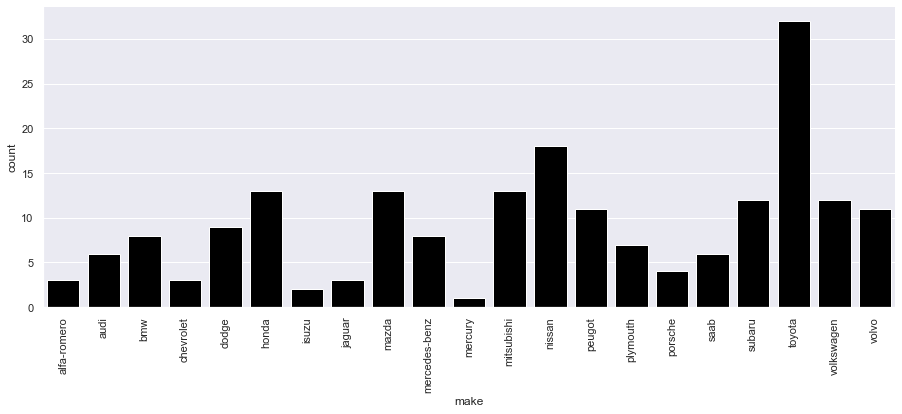

In [7]:
g = sns.catplot(x = 'make', data = auto_price, kind = 'count', color = 'black', aspect = 2.5);
g.set_xticklabels(rotation = 90);

## Scatter plots

A basic scatter plot shows the relationship between two variables. Points are plotted at the x-y coordinates of each value pair.

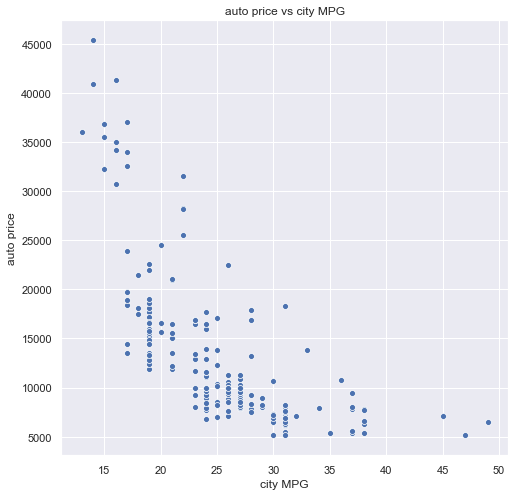

In [8]:
# ax = sns.scatterplot(x = auto_price['city-mpg'], y = auto_price['price']); # this works too
ax = sns.scatterplot(x = 'city-mpg', y = 'price', data = auto_price)
ax.set_title('auto price vs city MPG')
ax.set_ylabel('auto price')
ax.set_xlabel('city MPG');

The scatter plot shows the relationship between price and city MPG. The relationship is rather complex, with several regions, which seem isolated from one another. 

There is also a problem with **over plotting** on this display. Over plotting results when multiple data cases have the same, or nearly the same, values. Plotted points overlap, or lie one on top of the other, so that it is impossible to tell how many points are in some areas of the plot.    

### Exercise

1. Take the plot above and put the y-axis on a log scale (using base 2). HINT: You can use `np.log2`.

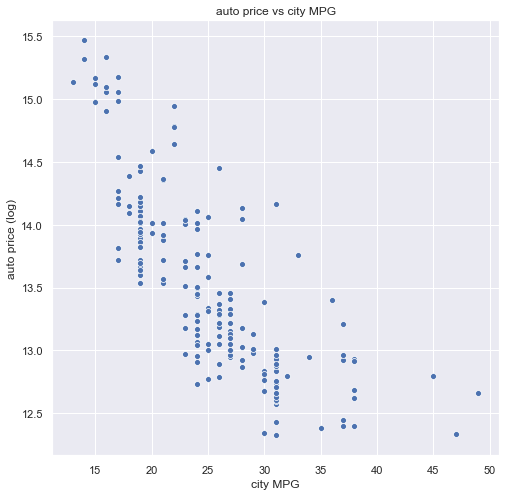

In [13]:
# ax = sns.scatterplot(x = auto_price['city-mpg'], y = auto_price['price']); # this works too
auto_price['price_log'] = np.log2(auto_price['price'])
ax = sns.scatterplot(x = 'city-mpg', y = 'price_log', data = auto_price)
ax.set_title('auto price vs city MPG')
ax.set_ylabel('auto price (log)')
ax.set_xlabel('city MPG');

2. Replace `scatterplot` with `jointplot`. What additional information is now displayed?

AttributeError: 'JointGrid' object has no attribute 'set_title'

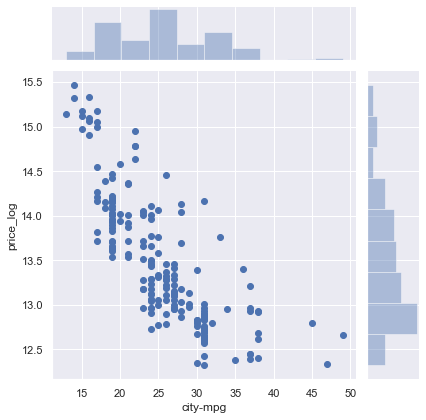

In [14]:
ax = sns.jointplot(x = 'city-mpg', y = 'price_log', data = auto_price)
ax.set_title('auto price vs city MPG')
ax.set_ylabel('auto price (log)')
ax.set_xlabel('city MPG');

3. What if we wanted to display information in the scatter plot? Use the `hue` argument for `scatterplot` to color-code the points by `num-of-doors`. In addition to `hue` which controls color, what are some other choices we can use to differentiate `num-of-doors` on the plot?

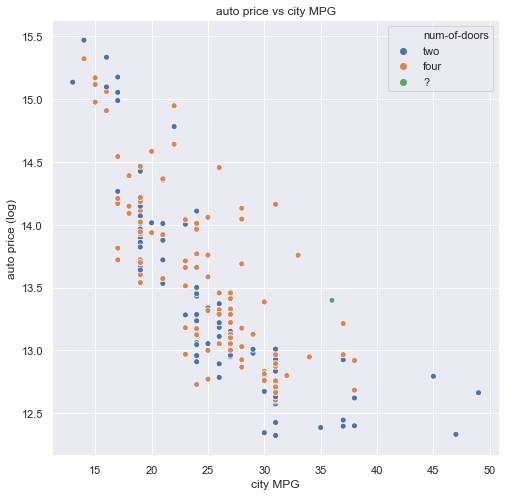

In [16]:
ax = sns.scatterplot(x = 'city-mpg', y = 'price_log', hue = 'num-of-doors', data = auto_price)
ax.set_title('auto price vs city MPG')
ax.set_ylabel('auto price (log)')
ax.set_xlabel('city MPG');

4. In the above plot, if the colors are too mixed up, it may be easier to break up the scatter plot into several, one for each value of `num-of-doors`. Replace `scatterplot` with `relplot` and the `hue` argument with the `col` argument. Which plot is better in your opinion?

AttributeError: 'FacetGrid' object has no attribute 'set_title'

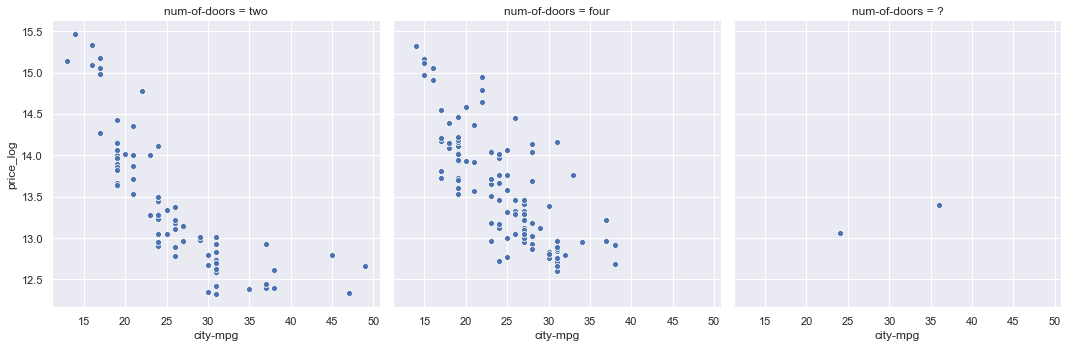

In [17]:
ax = sns.relplot(x = 'city-mpg', y = 'price_log', col = 'num-of-doors', data = auto_price)
ax.set_title('auto price vs city MPG')
ax.set_ylabel('auto price (log)')
ax.set_xlabel('city MPG');

5. One approach to deal with overplotting is to sample the data. Create the same scatter plot but using only 50% of the data. HINT: You can sample a `DataFrame` using the `sample` method.

AttributeError: 'FacetGrid' object has no attribute 'set_ylabel'

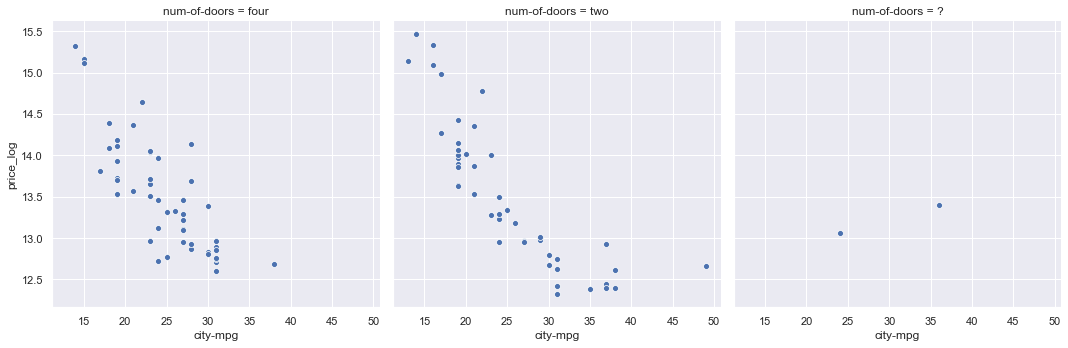

In [20]:
auto_sample = auto_price.sample(frac=0.5, random_state=42)

ax = sns.relplot(x = 'city-mpg', y = 'price_log', col = 'num-of-doors', data = auto_sample)
#ax.set_title('auto price vs city MPG')
ax.set_ylabel('auto price (log)')
ax.set_xlabel('city MPG');

6. Notice how some values are `city-mpg` are very common, which result in the scatter plot having vertical strips. Foretunately, there's probably enough price variation that we can still see the individual points, but sometimes that's not the case. Produce a scatter plot of `body-style` and `price`. After examining the plot, replace `scatterplot` with `stripplot` and examine the plot again. What changed?

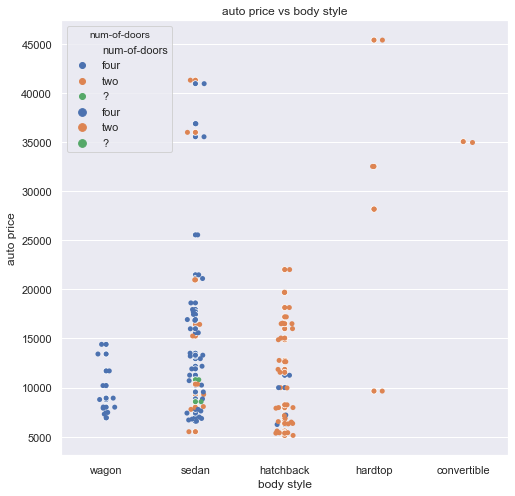

In [24]:
ax = sns.scatterplot(x = 'body-style', y = 'price', hue = 'num-of-doors', data = auto_sample)
ax.set_title('auto price vs body style')
ax.set_ylabel('auto price')
ax.set_xlabel('body style');

ax = sns.stripplot(x = 'body-style', y = 'price', hue = 'num-of-doors', data = auto_sample)
ax.set_title('auto price vs body style')
ax.set_ylabel('auto price')
ax.set_xlabel('body style');

7. Return to the original scatter plot with the y-axis unscaled. You can add a trend line by replacing `scatterplot` with `regplot`. To avoid truncating the plot, let `truncate = False`. Find out what the `order` argument is for and find a reasonable value for it.

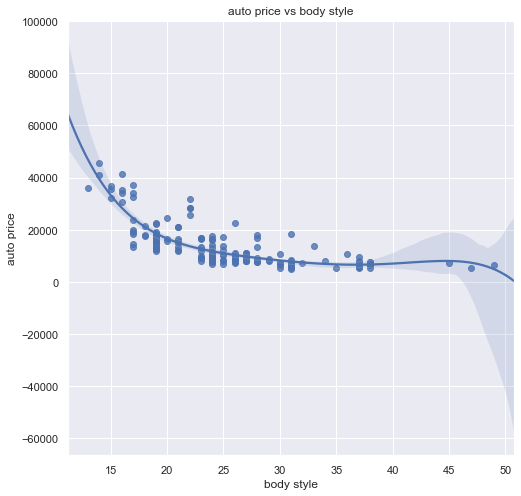

In [36]:
ax = sns.regplot(x = 'city-mpg', y = 'price', data = auto_price, truncate=False, order=5)
ax.set_title('auto price vs body style')
ax.set_ylabel('auto price')
ax.set_xlabel('body style');

# order is the polynomial order for the regression function.

### End of exercise

## Mixing aesthetics

As we saw, we can use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additional dimensions onto a two dimensional plot surface. Additionally, careful choice of plot aesthetics can highlight certain aspects of a data set you wish to present.   

There are many possible aesthetics one can use for visualization. Specific examples of aesthetics you will work with and the data types they are useful for are shown in the table below:

| Aesthetic | Data Types |
|----------|------------|
| Color | categorical|
| Size | numeric, ordered categorical |
| Marker shape | categorical |

Using the above aesthetics, we're able to project five dimensions of data unto a 2D scatter plot, which can lead to interesting insights about the data.

**Warning!** Don't over do it! Too many colors and shapes can be confusing, obfuscating rather than enlightening. Limit the number of categories you try to show with these aesthetics.

## Dealing with overplotting: using transparency

As already mentioned, **overplotting** is a significant problem with scatter plots. In this case, we are working with only 195 cases, and yet we see some overplotting. With a large data set, overplotting makes the plot appear blob-like, and rendering such a plot can also be very time consuming.

Transparency, is a useful aesthetic to overcome minor over plotting. Transparency is defined on a scale from 0 (completely transparent, or invisible) to 1 (perfectly opaque). By choosing reasonable transparency values, you can get a feel for how many points are clustered in a small area of a plot. 

The code in the cell below we use `alpha = 0.2` to adjust the transparency of individual points. This makes each point 80% transparent.

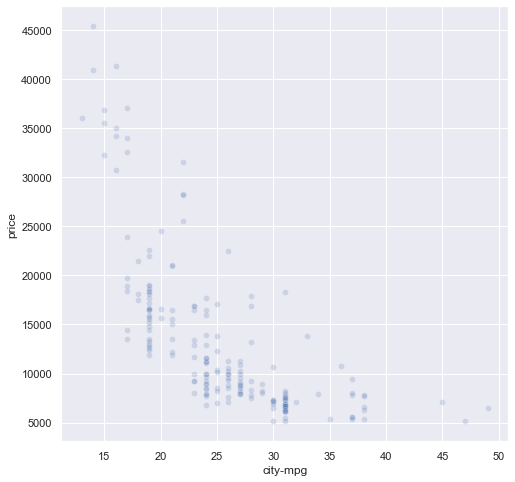

In [37]:
ax = sns.scatterplot(x = 'city-mpg', y = 'price', data = auto_price, alpha = 0.2);

In the plot above, you can now see where points are over plotted. As points lies one over another, you can see the darker color of the points. 

## Dealing with overplotting: 2D kernel density plot

A 2 dimensional kernel density plot works much like the 1 dimensional version we have already explored. This plot shows density of points rather that the individual points. In this way, a plot can be created very large number of points. 

In this case we will overlay the points on the kernel density plots. The code in the cell below, uses the `kdeplot` to compute and display a 2-d kernel density plot using a color scale. An axis is defined by the KDE plot and then used to add the scatter plot and plot attributes.

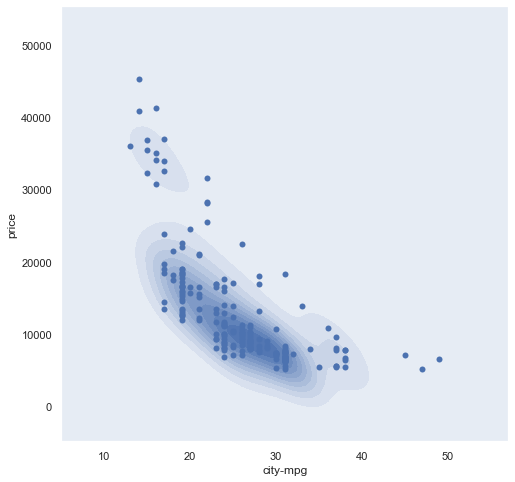

In [5]:
sns.kdeplot(auto_price['city-mpg'], auto_price['price'], shade = True)
sns.scatterplot(x = 'city-mpg', y = 'price', data = auto_price, linewidth = 0);

The 2D kernel density plot highlights the fact that the relationship between city MPG and price has multiple clusters of concentration. There is considerable overplotting in these regions. The points for the groups of outliers are even more prominent than before. 

## Dealing with overplotting: Hexbin plot

The 2-d KDE plot gives a good overall view of point density, but sharp transitions tend to be obscured. A hexbin plot provides more granular detail. Even bins with a single point are displayed, which may not be the case withh a 2-d KDE plot. However, a hexbin plot can have a 'choppy' appearance. Both hexbin and 2-d KDE plots can display very high point densities. 

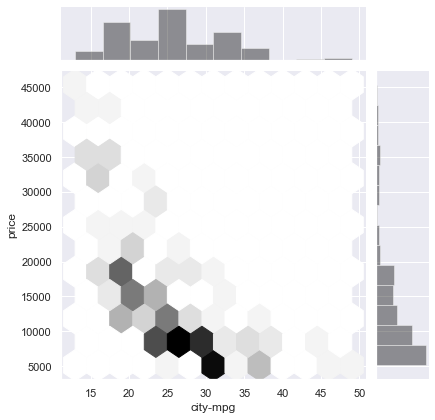

In [119]:
sns.jointplot(x = 'city-mpg', y = 'price', data = auto_price, kind = 'hex', color = 'black');

Examine this plot noticing the following:

- There are a large number of autos with low price and fuel economy of about 30-32 MPG. Some cells to the left at low price and an MPG around 25 MPG also show a concentration of autos.  
- Some outliers are clearly visible in the lower right and upper left. Some of these cells contain only one data point. As mentioned, seeing these sparse bins is a property of hexbin plots. 

## Heat maps

A heat map or raster plot allows you to visualize data which is naturally arranged on a regular grid or lattice. The heat map uses colors to show the values, or heat, on the grid. Data arranged on a lattice is fairly common in many areas including, spatial analysis, image analysis, and correlation analysis. 

In this example we create a heatmap of frequency of autos in price bins by the manufacturer. There are a number of preprocessing steps we must perform to create an array that can be displayed.

In [73]:
num_bins = 20
auto_price['price-bin'] = pd.cut(auto_price['price'], bins = num_bins, labels = range(num_bins))
auto_price[['price', 'price-bin']].head()

,price,price-bin
0,13495,4
1,16500,5
2,16500,5
3,13950,4
4,17450,6


You can see that the prices of the cars are now in numbered bins. 

Next, we need to create an array of auto price bins by make. This is done by the following steps:

1. The `crosstab` method is used to create an array of the count of price bin by manufacturer. 
2. The number of cars by manufacturer needs to be normalized so it is in a range $\{ 0, 1 \}$. If we did not normaize manuafactures with larger numbers of models would dominate the heatmap. The normalization is done in two steps:
  - The sum of each column is computed using the `apply` method. The `apply` method applies the specified function along the axis of the data frame specified.
  - The number of autos in each array element is divided by the elements of the vector of the sum of numbers of autos using the `.div` method.
  
Execute this code and examine the head of the normalized data frame.

In [74]:
make_price = pd.crosstab(auto_price['price-bin'], auto_price['make'], normalize = 'columns')
make_price[['audi', 'mazda']]

make,audi,mazda
price-bin,,
0,0.000000,0.307692
1,0.000000,0.230769
2,0.000000,0.230769
3,0.000000,0.076923
4,0.166667,0.000000
5,0.166667,0.000000
6,0.500000,0.153846
7,0.000000,0.000000
8,0.000000,0.000000


Whenever you create bins, it is a good idea to double-check that all posible bis are in your data:

In [75]:
missing_idx = [i for i in range(num_bins) if i not in make_price.index.ravel()]
missing_idx

[16, 18]

As you can see in this example, some bins are missing. This is a problem, as plots will be misleading: plots would make the data appear to cover the complete spectrum, while in fact there are holes!

A simple solution is to add the missing bins manually. (Better solution would be to prepare the result structure and pre-set everything with (in this case) zeros. The binning then replaces the data where it's available.

In [78]:
for idx in missing_idx:
    make_price = make_price.append(pd.Series(name = idx, dtype = 'float64'))

make_price = make_price.sort_index() # dort the result data set
make_price = make_price.fillna(0)
make_price

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
price-bin,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000,1.0,0.444444,0.384615,0.5,0.000000,0.307692,0.000,...,0.307692,0.222222,0.000000,0.428571,0.00,0.000000,0.250000,0.15625,0.000000,0.000000
1,0.000000,0.000000,0.000,0.0,0.444444,0.384615,0.0,0.000000,0.230769,0.000,...,0.230769,0.388889,0.000000,0.428571,0.00,0.000000,0.333333,0.34375,0.416667,0.000000
2,0.000000,0.000000,0.000,0.0,0.000000,0.153846,0.5,0.000000,0.230769,0.000,...,0.230769,0.055556,0.000000,0.000000,0.00,0.000000,0.250000,0.25000,0.250000,0.000000
3,0.000000,0.000000,0.000,0.0,0.111111,0.076923,0.0,0.000000,0.076923,0.000,...,0.076923,0.000000,0.181818,0.142857,0.00,0.333333,0.166667,0.09375,0.166667,0.090909
4,0.333333,0.166667,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.153846,0.166667,0.181818,0.000000,0.00,0.166667,0.000000,0.00000,0.166667,0.090909
5,0.666667,0.166667,0.250,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.055556,0.454545,0.000000,0.00,0.166667,0.000000,0.12500,0.000000,0.272727
6,0.000000,0.500000,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.153846,0.000,...,0.000000,0.055556,0.181818,0.000000,0.00,0.333333,0.000000,0.03125,0.000000,0.272727
7,0.000000,0.000000,0.250,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.055556,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.00000,0.000000,0.272727


Notice that all of the values are in the range $\{ 0, 1 \}$. And now all bins are set!

Finally, we are ready to make the heat map plot! The code in the cell below follows the recipe we have used for other plot types. The `pcolor` method has two main arguments, the array and `cmap = 'Blue'` argument sets the palette. Execute this code and examine the results.

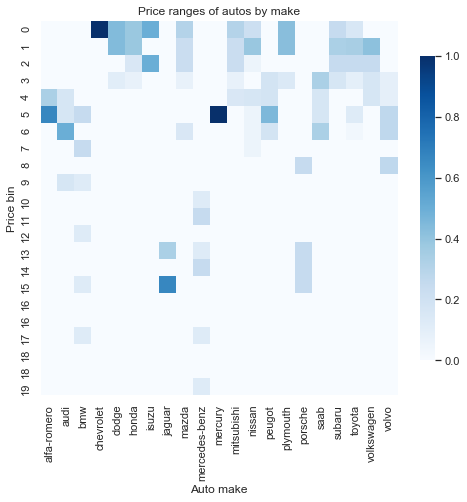

In [79]:
ax = sns.heatmap(make_price, cmap = 'Blues', square = True, cbar_kws = {'shrink': 0.7})
ax.set_xlabel('Auto make')
ax.set_ylabel('Price bin')
ax.set_title('Price ranges of autos by make');

Examine this heat map. In this case, the values in the array are quite sparse. The many zeros are shown in the lightest shade of blue. In many applications the heat map will not have such a large fraction of zeros. 

The darker the shade of blue, but larger the fraction of auto models a manufacturer has in a price bin. Some examples of interpretation are:

1. Chevrolet has only one auto at the lowest price. 
1. Mercedes-Benz autos range from the middle of the range to the most expensive. 
1. BMW autos span the largest price range.

It may be easier to see this if somehow we could re-arrange the heatmap so that similar cars are placed next to each other in the x-axis. There is a way to accomplish that using **hierarchical clustering**, which is an ML-related topic so we will not go into the weeds here, but let's see how it works in action:

In [95]:
import scipy.cluster.hierarchy as sch
# from scipy.special import comb

pairwise_distances = sch.distance.pdist(make_price.transpose(), metric = 'euclidean')
linkage = sch.linkage(pairwise_distances, method = 'average')
dist_threshold = pairwise_distances.mean()
idx_to_cluster_array = sch.fcluster(linkage, dist_threshold, criterion = 'distance')
idx = np.argsort(idx_to_cluster_array)

The above snippet end by providing us with a list of indices `idx` which we can use to re-arrange the data so cars next to each other are more similar (in the vertical direction).

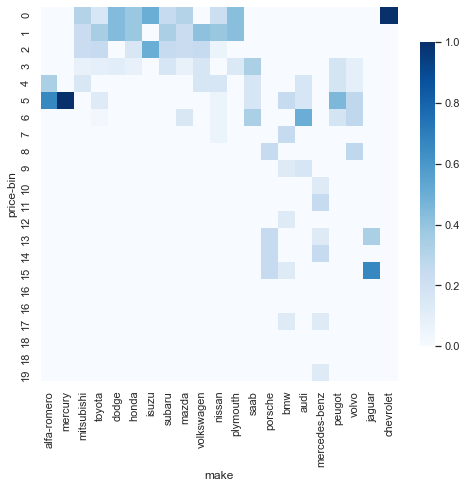

In [96]:
sns.heatmap(make_price.iloc[:, idx], vmax = 1.0, cmap = 'Blues', square = True, cbar_kws = {'shrink': 0.7});

We can get the above plot even more easily by using `sns.clustermap`, which does a similar computation under the hood and as a bonus also shows us the **dendogram** showing how the clustering is happening.

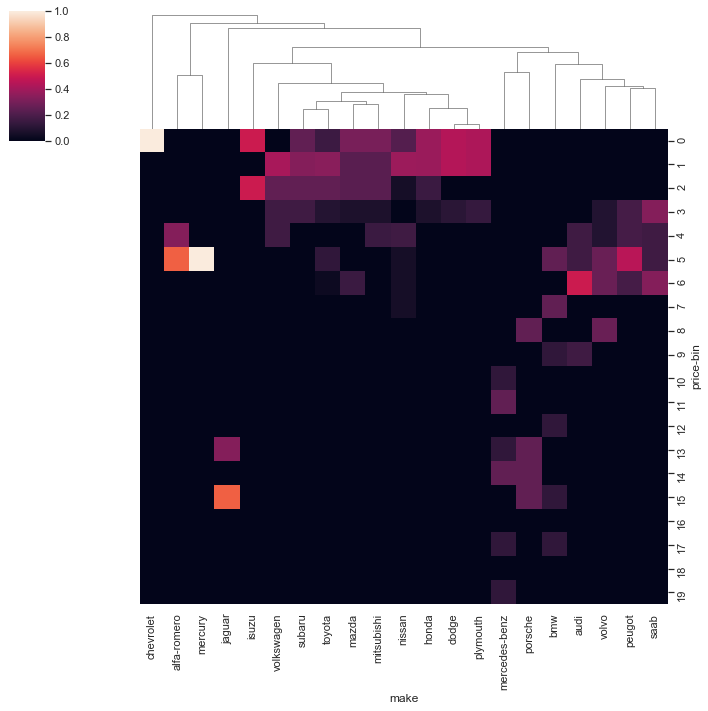

In [71]:
ax = sns.clustermap(make_price, row_cluster = False)

## Line plots

Line plots are used to show the relationship between variables with ordered values, such as time series data.

As a first step, you will load time series data on the monthly number of subspots between 1749 and 2013. This is done using the following operations:
1. Read the raw csv file.
2. Convert the string values of year and month to datetime type.
3. Use the datatime object to set the index of the Pandas Series. This creates a Pandas time series object.
4. Print the head and tail of the Pandas Series.

In [157]:
sunspots = pd.read_csv('https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/sunspots.csv')

sunspots['date'] = pd.to_datetime(sunspots['date'])
sunspots.set_index('date', inplace = True)
sunspots.tail()

,spots
date,
2013-05-01,78.7
2013-06-01,52.5
2013-07-01,57.0
2013-08-01,66.0
2013-09-01,37.0


### Exercise

1. Create a line plot of this time series. With the x-axis set to the index, a time series plot will be created.

2. Use `plt.figure(figsize = (x, y))` to change the aspect ratio of the plot so the trend is easier to see. You need to place this at the top of the code and choose `x` and `y` so the aspect ratio looks good.

3. It is often helpful to smooth out a time series plot using a moving average. In `pandas`, we can easily calculate moving averages (or other statistic) using the `rolling` method. An example is shown below. Why are the first two values `NaN`?

In [179]:
x = pd.Series([5, 9, 10, 4, 8])
x.rolling(3).mean()

0         NaN
1         NaN
2    8.000000
3    7.666667
4    7.333333
dtype: float64

4. Create a new plot that shows both the original time series and the smoothed out time series using a rolling average with the window size set to 24.

The plot shows the number of sunspots on the vertical axis and the datetime on the horizontal axis. 

## Plots for higher dimensions

You have explored basic plot types and used aesthetics to project multiple dimensions onto basic plot types. Will will now investigate ulti-axis plots project different views of a data set. We will now explore several aspects of multi-axis plots: 

- Correlation plots
- Pairwise scatter plots
- Faceted plots

### Correlation plots

With a large number of variables it can be quite difficult to understand the correlation matrix. There are a number of ways to display correlation relationships. In this lesson we will use a heatmap, which is especially effective when there are lots of features.

## Mixing aesthetics

As we saw, we can use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additional dimensions onto a two dimensional plot surface. Additionally, careful choice of plot aesthetics can highlight certain aspects of a data set you wish to present.   

There are many possible aesthetics one can use for visualization. Specific examples of aesthetics you will work with and the data types they are useful for are shown in the table below:

| Aesthetic | Data Types |
|----------|------------|
| Color | categorical|
| Size | numeric, ordered categorical |
| Marker shape | categorical |

Using aesthetics with a bit of cleverness can lead to interesting insights about a data set.

### Exercise

Create the scatter plot of `city-mpg` by `price` we looked at earlier, but now add the following aesthetics:

- color-code the dots by `fuel-type`
- use a different style of point based on `aspiration`
- let the size of the points be influenced by `engine-size`

Using the above aesthetics, we're able to project five dimensions of data unto a 2D scatter plot.

In [276]:
plt.figure(figsize = (13, 10)) # this makes more room for the plot
# sns.scatterplot();

<Figure size 936x720 with 0 Axes>

<Figure size 936x720 with 0 Axes>

Some conclusions we can draw from the chart above include:

- The most expensive cars have generally larger, standard aspiration, gas engines. 
- Most diesel cars use turbo aspiration and these tend to be more expensive. 
- Turbo aspiration gas engine cars are in the low range of fuel efficiency, but in the middle of the price range. 
- Most low cost cars have small standard aspiration engines.

For each of the above conclusions, specify which aesthetics are used to draw the conclusion.

**Warning!** Don't over do it! Too many colors and shapes can be confusing, obfuscating rather than enlightening. Limit the number of categories you try to show with these aesthetics.

### End of exercise

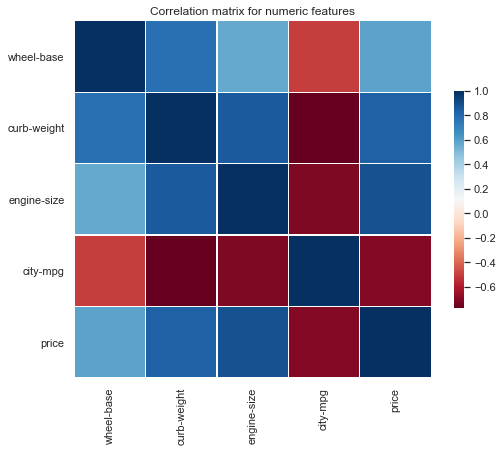

In [315]:
sns.heatmap(auto_corr, vmax = 1.0, cmap = 'RdBu', square = True, linewidths = .25, cbar_kws = {'shrink': 0.5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'vertical')
plt.show()

Another option for displaying the correlation matrix is to color code only to the significant correlations.

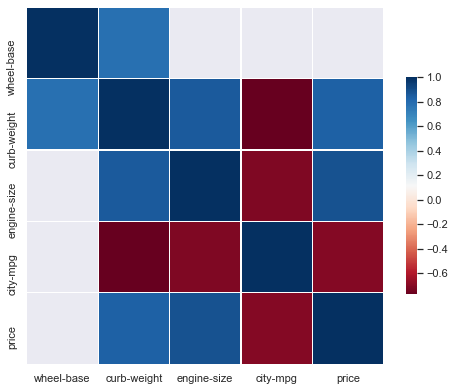

In [316]:
corr_threshold = 0.7
sns.heatmap(auto_corr[np.abs(auto_corr) >= corr_threshold], vmax = 1.0, cmap = 'RdBu', square = True, 
            linewidths = .25, cbar_kws = {'shrink': 0.5});

Examine this plot. The darker the color the higher the correlation; positive and negative. 

## Scatter plots matrix

Pair wise scatter plots, also know as scatter plot matrices, allow you to view multiple dimensions of a data set on one plot. A scatter plot is shown of each variable versus all other variables, arranged in an array. Another type of plot, such as a KDE plot, can be shown for each pair of variables on the diagonal. Optionally, regression lines can be added to each scatter plot. Also optionally, other plot types, such as 2-d KDE plots, can be used for the upper or lower diagonal.

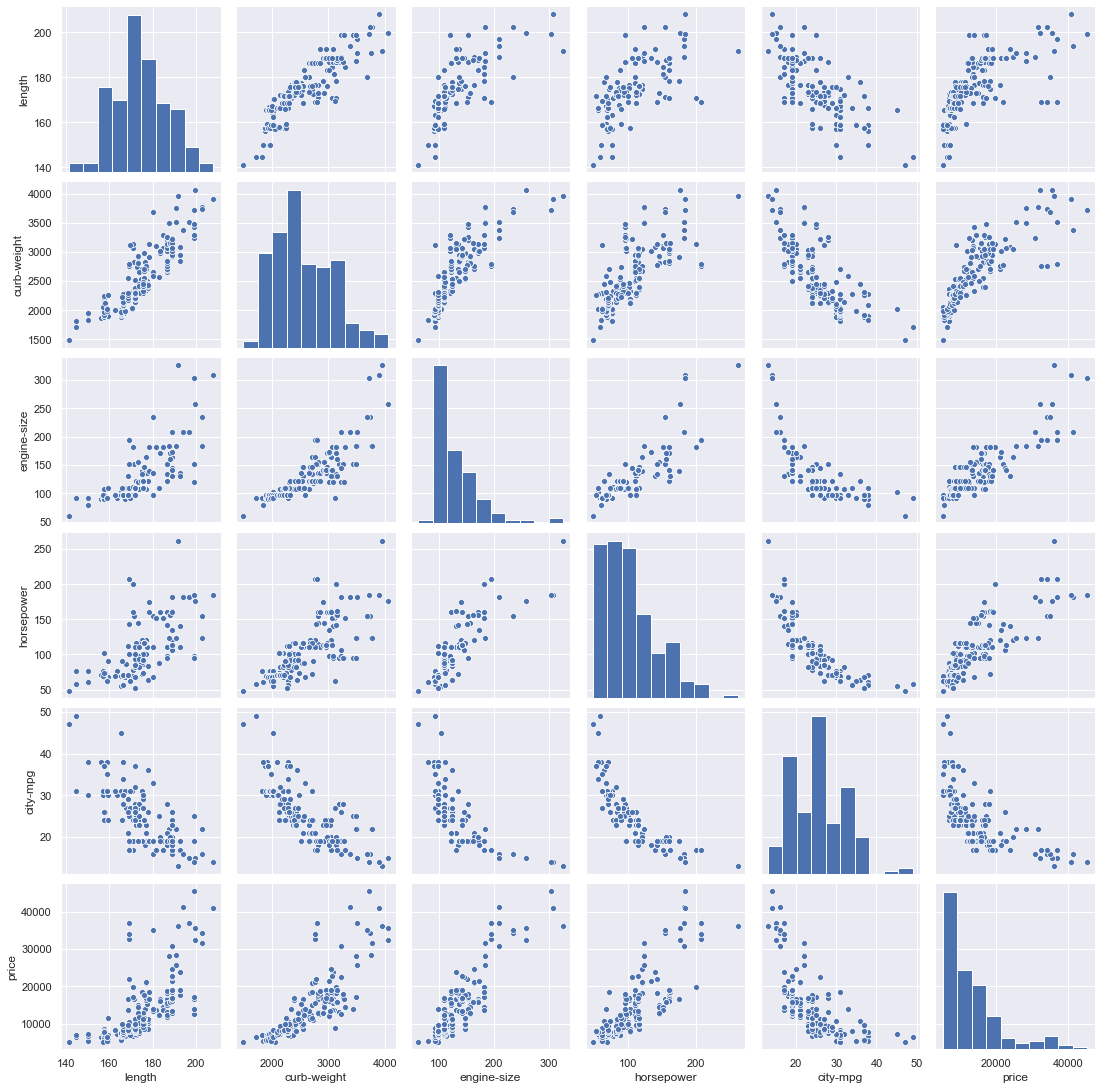

In [321]:
num_cols = ['length', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'price', 'fuel-type']
sns.pairplot(auto_price[num_cols]);

The code in the cell below plots the scatter plot matrix for the selected variables of the data set. Some key aspects of this code includes:
1. The plot is created with the seaborn `pairplot` method.
2. The `hue` argument is used to display the fuel type.
3. The `diag_kind="kde"` argument places KDE plots along the diagonal.
4. The `map_upper` method places a different plot type on the upper diagonal, using the following arguments:
  - The plot type is specified as a seaborn `kdeplot`.
  - The color palette is set to `"Blues"`. 
  
Execute this code and examine the results.

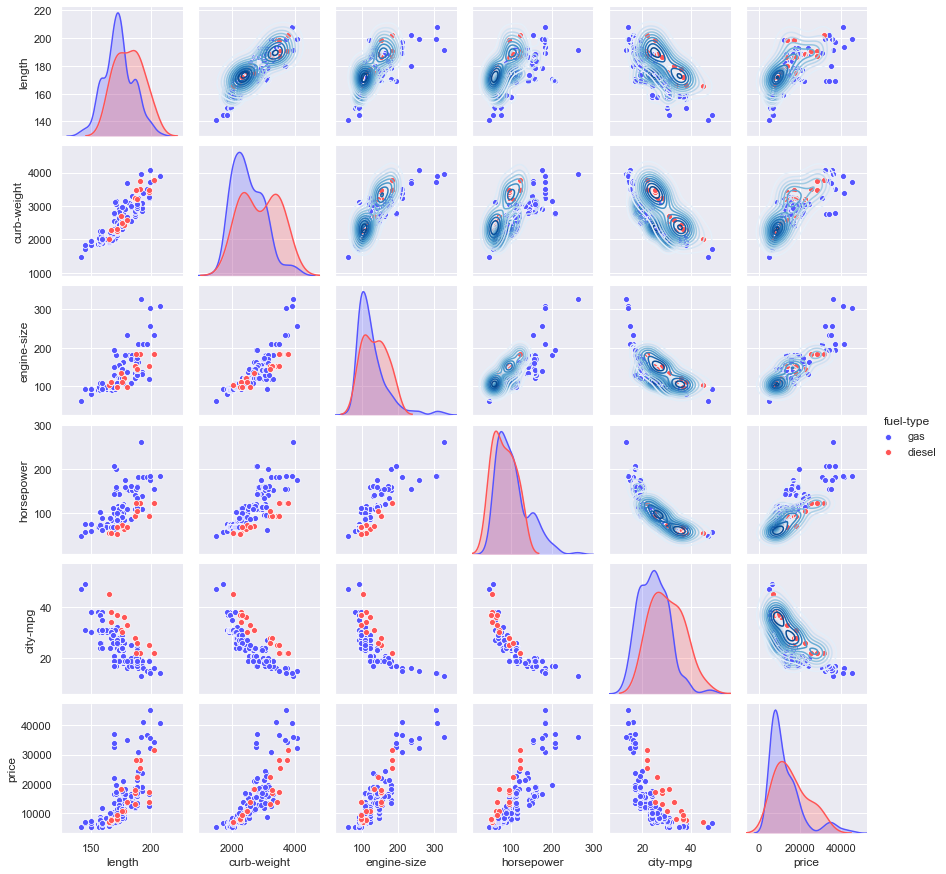

In [319]:
sns.pairplot(auto_price[num_cols], hue = 'fuel-type', palette = 'seismic', diag_kind = 'kde', 
             height = 2).map_upper(sns.kdeplot, cmap = 'Blues');

There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- The KDE plots of the variables generally show a skew to the left, or lower values. This is generally true for both fuel types. 
- Several of the variables have a fairly linear relationship. For example, the relationships between wheel base, curb weight and engine size.
- Other relationships are clearly nonliner. For example, the relationships between price and city MPG and city MPG, and horsepower. 
- Other relationships are less clear cut. For example, the relationship between price and horsepower, or price and wheelbase. 
- Several of the d-2 KDE plots show multimodal behavior, particularly relationships with length, curb weight, and engine size. 

### Facet plots

You have explored using plot asthetics to project additional dimensions onto the two dimensional plot surface. You have also used scatter plot matrices to examine the relationships in several variables. Now, you will look at using facet plots or conditioned plots.

A faceted or conditioned plot is comprised of a set of sub-plots, defined by one or more conditioning variables. The data in each sub-plot are sub-setted, based on the values of the conditioning or faceting variable. This conditioning operation is, in effect, a **group-by** operation. 

In some cases, faceting can be done relatively easily using the `row` or `col` arguments if that option exists. For example, `catplot` has that option, so we can use it to create several bar plots.

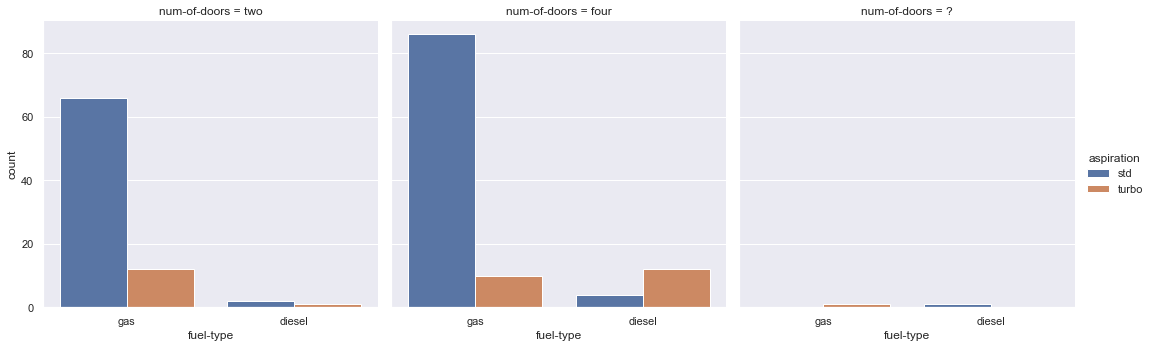

In [376]:
sns.catplot(x = 'fuel-type', hue = 'aspiration', data = auto_price, 
            col = 'num-of-doors', kind = 'count', height = 5, aspect = 1);

A `catplot` is a specific example of a more general function called `FacetGrid`, which acts as a wrapper for visualization functions such as `barplot`, `distplot`, `scatterplot`, etc. Here's an example:

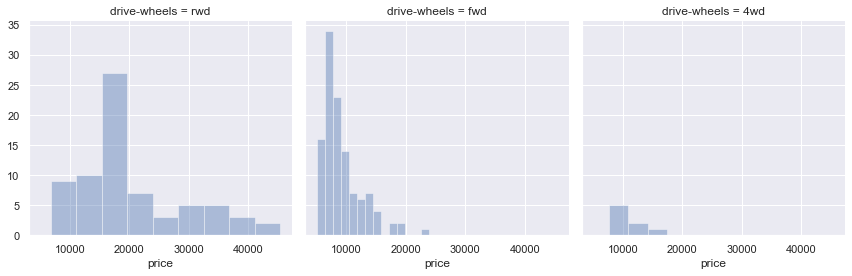

In [21]:
gr = sns.FacetGrid(auto_price, col = 'drive-wheels', height = 4)
gr = gr.map(sns.distplot, 'price', kde = False)

The three histograms are displayed in the grid; one for each value of the conditioning variable, drive wheels. The labels at the top of each plot display the value of the conditioning variable. 

From these plots we can see that the price of the 4wd cars overlaps the fwd cars, and the rwd cars have a greatest range of prices.  

Let's try another example. In this case, there are two conditioning variables, fuel type and aspiration, defining a two dimensional grid. Fuel type conditions the rows. Aspiration conditions the  columns. Execute this code and examine the results.

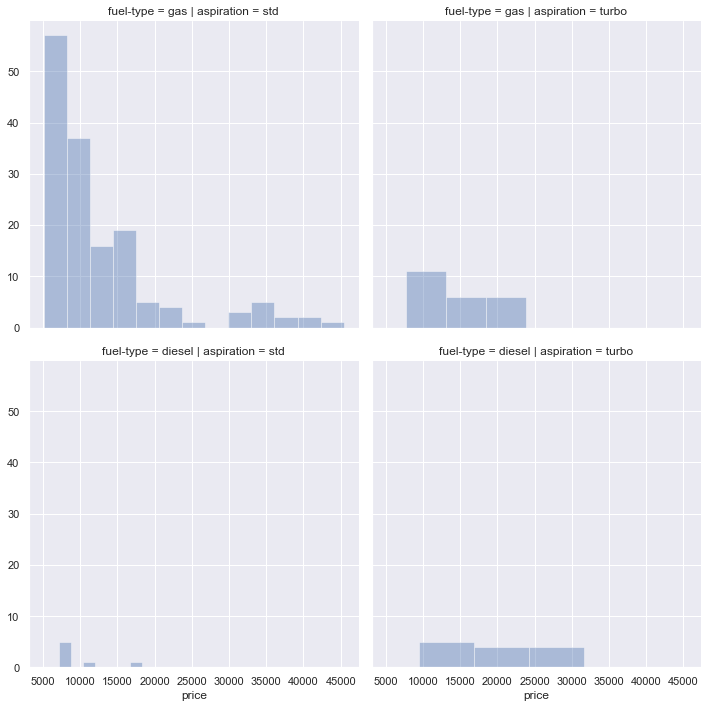

In [18]:
g = sns.FacetGrid(auto_price, col = 'aspiration', row = 'fuel-type', height = 5)
g = g.map(sns.distplot, 'price', kde = False)

You can see the two dimensional grid of the conditioned histograms. The titles on the top show the value of the aspiration and fuel type. The combination of aspiration and fuel type define the conditioning grid. 

Here is another example. The code in the cell below computes a grid of scatter plots conditioned by drive wheels for the column (horizontal) and body type for row (vertical) conditioning variables. The color for fuel type category is set by the `hue` and `palette`arguments for the `FacetGrid` method. In this case, the matplotlib `scatter` method is used. Execute this code and examine the result.

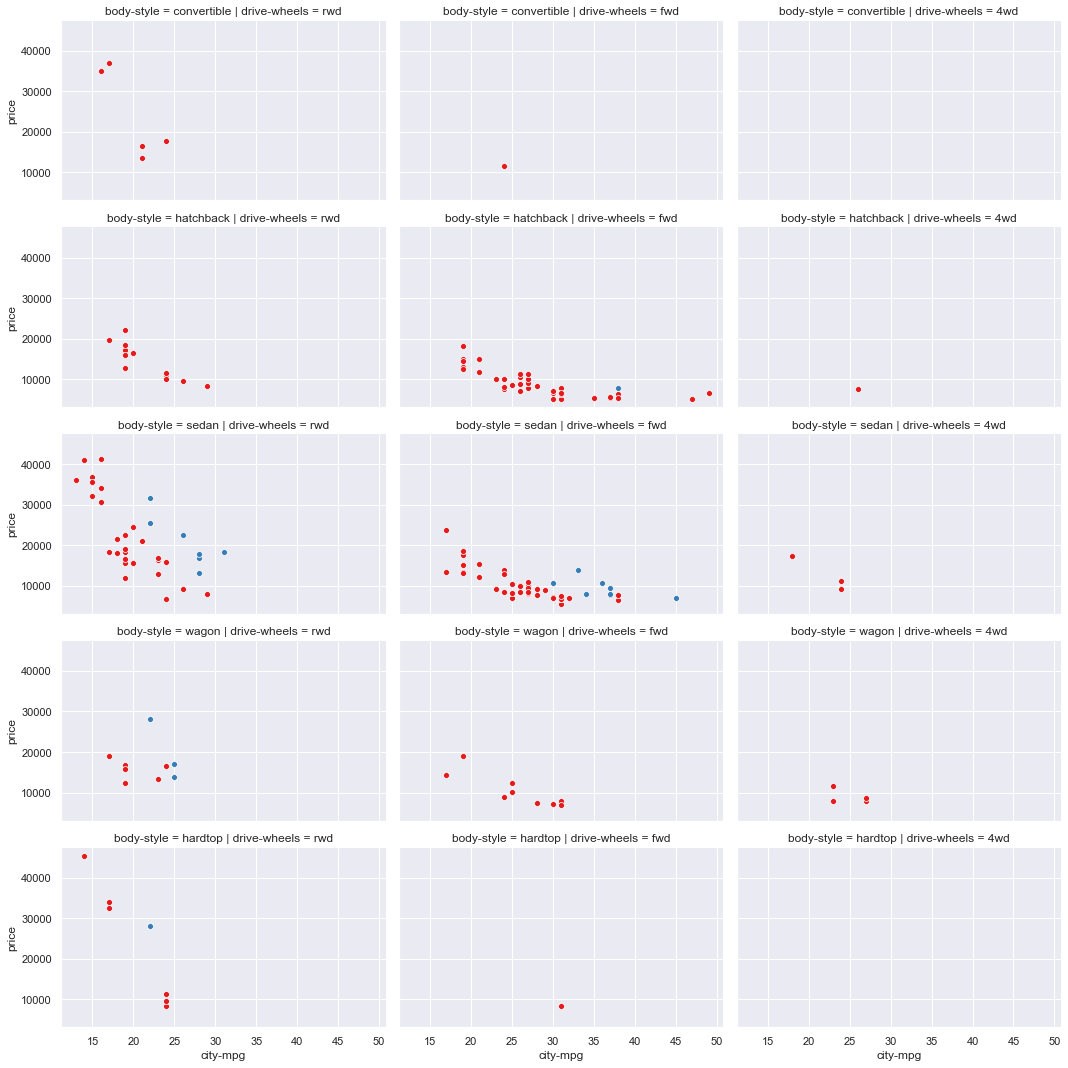

In [381]:
g = sns.FacetGrid(auto_price, col = 'drive-wheels', row = 'body-style', hue = 'fuel-type', palette = 'Set1')
g.fig.set_figwidth(15)
g.fig.set_figheight(15)
g.map(sns.scatterplot, 'city-mpg', 'price');

This plot projects five dimensions of the data set onto the two dimensional plot surface. Study this plot carefully, thinking about what you can learn.

### Exercise

Create a new conditioned scatter plot of `curb-weight` and `horsepower` using `aspiration` as the column (horizontal), and `num-of-cylinders` for the row (vertical) conditioning variables. Use color to distinguish `fuel type`. 

1. How many 8 cylinder standard aspiration cars are in the data set? 
2. Do any cars with larger numbers of cylinders (8, or 12) use turbo aspiration? .
3. In general do 4 cylinder turbo cars have more horsepower for the weight than 4 cylinder standard aspiration cars? 
4. Do diesel cars generally have greater or less horsepower for a given weight than gas cars?

Try your plots again, but this time let the `FacetGrid` function's `sharex` and `sharey` arguments be `False`. How does this change your plots? When should we use one or the other? Another useful pair of arguments are `xlim` and `ylim`.

In addition to `FacetGrid`, there is also `PairGrid` and `JointGrid` which can be used to create customized versions of `pairplot` and `jointplot` which we used earlier.

### End of exercise

## Summary

You have covered a lot of ground in this lesson. You have explored many of the relationships in the auto price data set by creating multiple views to visualize these data. However, there  are still quite a few relationships you have not examined. For example, what about relationships with the weight or dimensions of the cars? What does new information do these introduce? In practice, you will always need to explore many dimensions of a data set for you to truly understand the important relationships. 

Specifically, in this tutorial you have:

- Applied basic bi-variate chart types to examine the relationships between pairs of variables. You used scatter plots with low alpha (transparency) values, as well as KDE and hexbin plots to overcome overplotting. 
- Used plot aesthetics to project additional dimensions onto a two dimensional plot surface, or to highlight aspects of the relationships in the data. Size is a plot aesthetic useful for numeric values or ordered categorical variables. Color and marker shape are useful for categorical variables. Keep in mind to limit the number and type of categories of categorical variables. Failure to do so will result in plots with many similar colors and marker shapes, which are difficult to understand at best. 
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. The scatter plot matrix allows you to display relationships between multiple variables on a single set of axes. In faceted plotting subsets of values (grouped values) at displayed on an array of axes. 

Finally, **have fun exploring your data!**

In [39]:
auto_price.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
price_log            float64
dtype: object

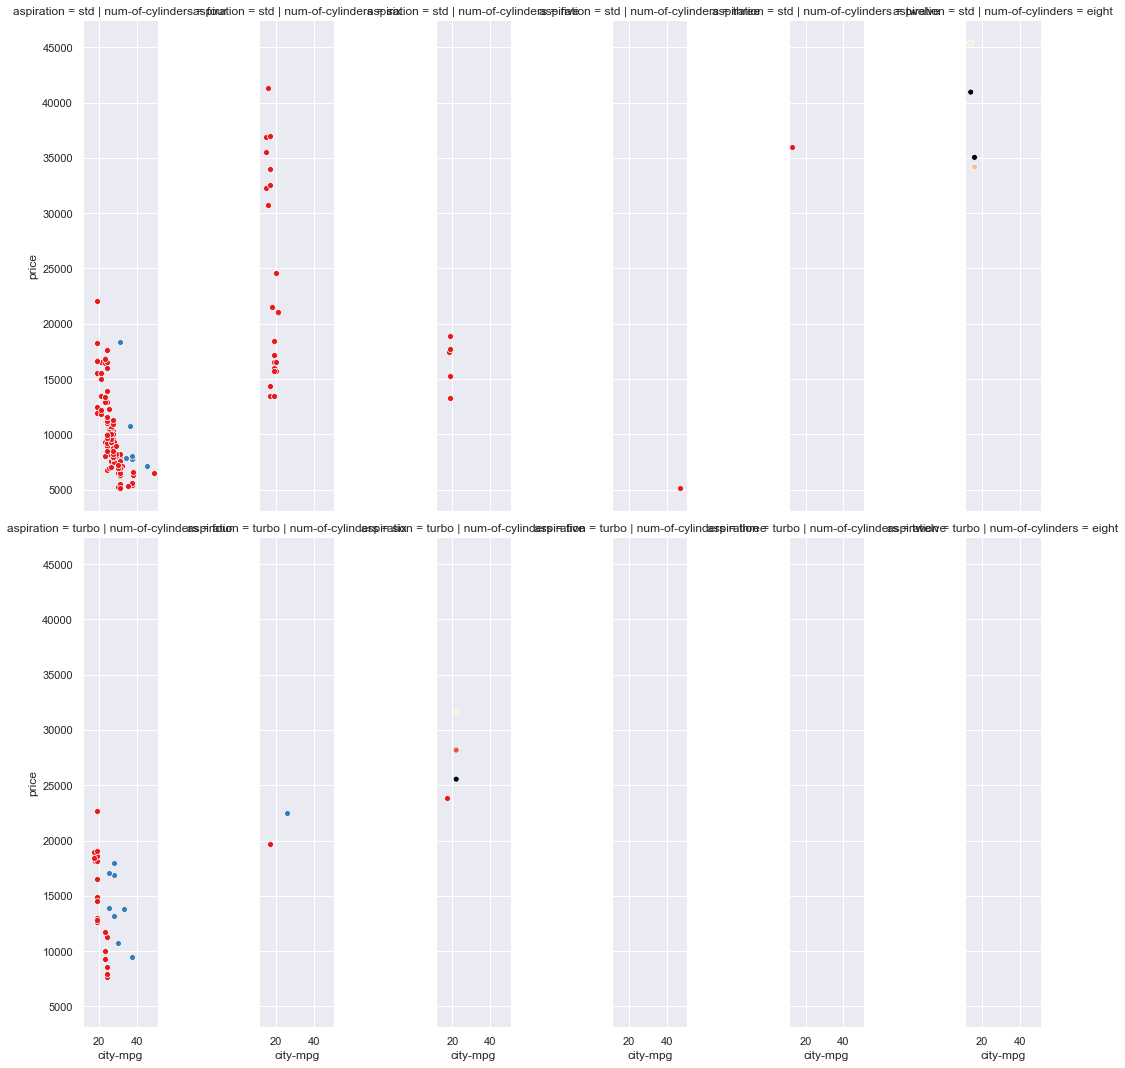

In [40]:
# Quiz excercises
g = sns.FacetGrid(auto_price, col = 'num-of-cylinders', row = 'aspiration', hue = 'fuel-type', palette = 'Set1')
g.fig.set_figwidth(15)
g.fig.set_figheight(15)
g.map(sns.scatterplot, 'city-mpg', 'price');

In [42]:
auto_price.groupby(['num-of-cylinders', 'aspiration']).count()['make']

num-of-cylinders  aspiration
eight             std             4
five              std             5
                  turbo           5
four              std           126
                  turbo          29
six               std            22
                  turbo           2
three             std             1
twelve            std             1
Name: make, dtype: int64

In [43]:
auto_price['hp_100'] = auto_price['horsepower'].apply(lambda x: 1 if x >= 100 else 0)


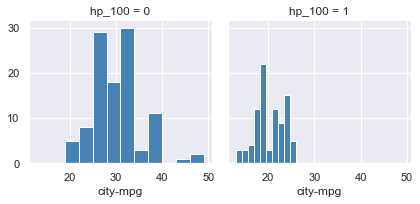

In [46]:
g = sns.FacetGrid(auto_price, col="hp_100", margin_titles=True)
g.map(plt.hist, "city-mpg", color="steelblue");

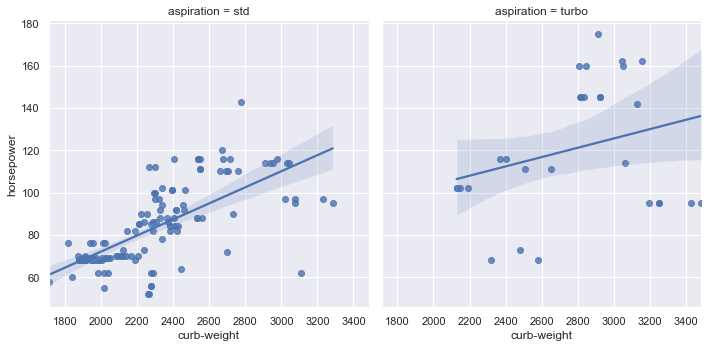

In [61]:
#g = sns.FacetGrid(auto_price, col="aspiration", margin_titles=True)
#g.map(plt.regplot, "horsepower", "weight", color="steelblue");

auto_price_4 = auto_price[auto_price['num-of-cylinders'] == 'four']
#auto_price['num-of-cylinders']
g = sns.lmplot(x="curb-weight", y="horsepower", col="aspiration", data=auto_price_4)

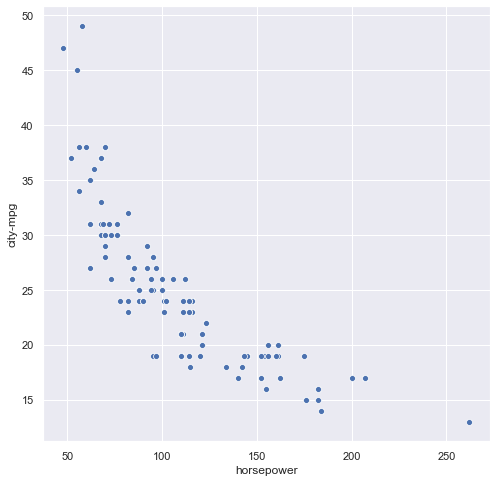

In [62]:
ax = sns.scatterplot(x = 'horsepower', y = 'city-mpg', data = auto_price)

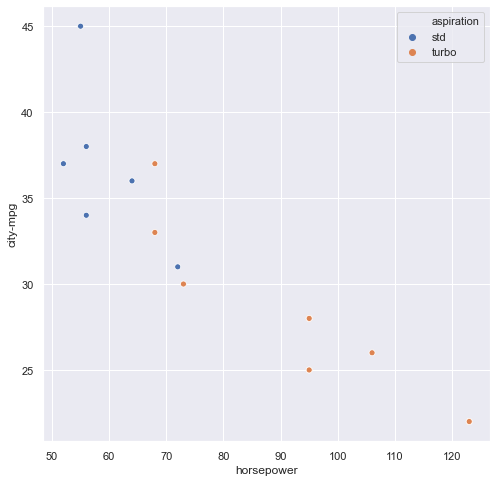

In [69]:
auto_price_diesel = auto_price[auto_price['fuel-type'] == 'diesel']
ax = sns.scatterplot(x = 'horsepower', y = 'city-mpg', hue='aspiration', data = auto_price_diesel)

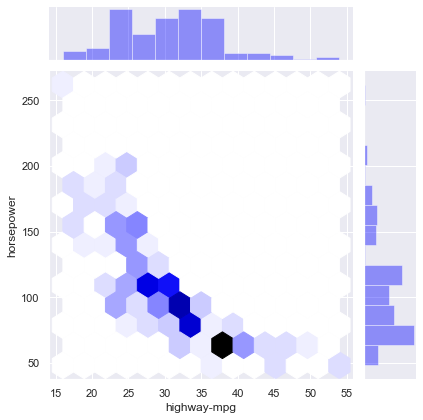

In [71]:
ax = sns.jointplot(x = 'highway-mpg', y = 'horsepower', data = auto_price, kind = 'hex', color = 'blue');

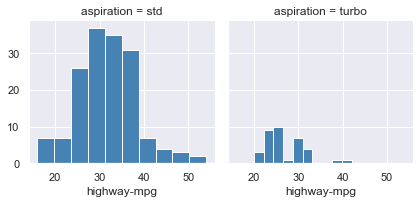

In [78]:
g = sns.FacetGrid(auto_price, col="aspiration", margin_titles=True)
g.map(plt.hist, "highway-mpg", color="steelblue");